<a href="https://colab.research.google.com/github/Megha0222/sum/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import metrics

In [309]:
df=pd.read_csv("/content/erpfcst_1993-2015.wk4.csv")

In [310]:
df.head()
a=range(1,333)
b=range(1,773)

In [311]:
df.drop(['date'],axis=1)

,observed,forecast
0,0.0845,0.255612
1,0.0000,0.141152
2,0.0000,1.857550
3,0.3025,0.637311
4,2.3859,0.873125
...,...,...
1099,0.0000,0.135735
1100,0.0000,2.392986
1101,0.0000,0.960035
1102,0.0000,1.291194


In [312]:
X=np.asanyarray(df[['observed']]).astype('int')
y=np.asanyarray(df['forecast']).astype('int')
print(X.shape)
print(y.shape)

(1104, 1)
(1104,)


In [313]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [314]:
len(X_train)


772

LINEAR REGRESSION

In [315]:
#LINEAR REGRESSION
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [316]:
LR.score(X, y)   #COEFFICIENT
LR.coef_

array([0.18116803])

In [317]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [318]:
LR_predict = LR.predict(X_test) #Predictions on Testing data
print(LR_predict)

[0.45966243 0.64083045 0.45966243 0.45966243 0.45966243 4.08302293
 0.45966243 0.45966243 0.45966243 0.45966243 0.45966243 0.45966243
 0.82199848 2.27134268 0.45966243 0.45966243 0.45966243 1.36550255
 0.45966243 0.64083045 0.45966243 0.45966243 5.53236713 0.45966243
 0.45966243 1.90900663 0.45966243 0.45966243 0.45966243 0.45966243
 0.64083045 0.45966243 0.45966243 4.98886306 0.45966243 0.45966243
 1.18433453 0.45966243 1.7278386  0.45966243 0.45966243 1.0031665
 0.45966243 0.45966243 0.45966243 2.4525107  0.45966243 0.45966243
 0.45966243 0.45966243 0.64083045 0.45966243 0.45966243 0.82199848
 0.45966243 0.45966243 2.4525107  0.45966243 0.45966243 0.82199848
 0.82199848 0.45966243 0.45966243 0.45966243 0.45966243 4.80769503
 0.45966243 0.45966243 0.45966243 0.45966243 0.45966243 0.45966243
 0.64083045 1.18433453 0.45966243 0.45966243 0.64083045 2.81484675
 0.45966243 0.45966243 0.45966243 0.45966243 0.45966243 2.81484675
 0.45966243 1.7278386  0.45966243 0.45966243 0.64083045 0.45966

In [319]:
# np.savetxt('/content/sample_data.csv',X_test ,delimiter=',')

In [320]:
# model accuracy (ncmrwf forecast vs Bias Corrected (LM) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 0.8803256722665658
MSE: 1.700646257097229
RMSE: 1.304088285775633

-------Train Data--------
MAE: 0.8936187338899669
MSE: 1.829346502994531
RMSE: 1.3525333648359774

-----Training Accuracy-------
18.4
-----Testing Accuracy--------
-6.0


In [321]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.8313253012048192
MSE: 18.47590361445783
RMSE: 4.298360572876342
-------observation vs model forecast --------
MAE: 1.6175742893531124
MSE: 13.415674114123041
RMSE: 3.662741338686509


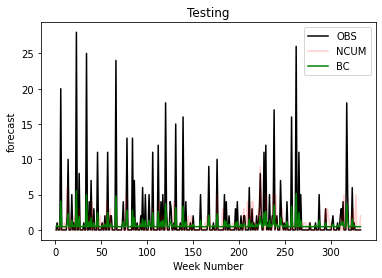

In [322]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('LM.png')


plt.show()

Text(0.5, 1.0, 'Testing')

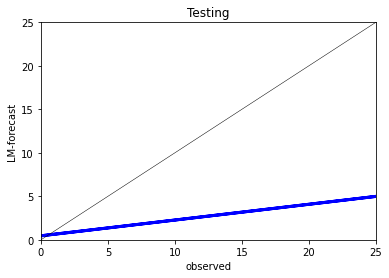

In [323]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('LM-forecast')
plt.title('Testing')


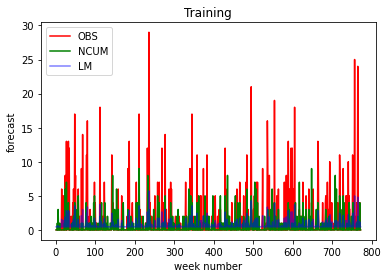

In [324]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Training')

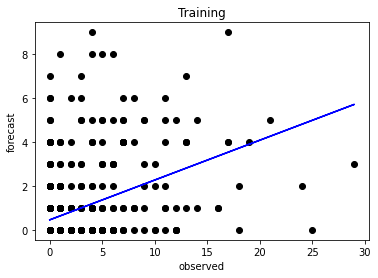

In [325]:

#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Testing')

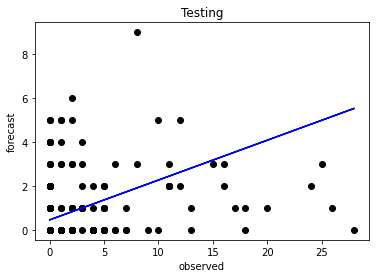

In [326]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

SUPPORT VECTOR MACHINE CODE


In [327]:
#SUPPORT VECTOR CLASSIFIER
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [328]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [329]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.8313253012048192
MSE: 18.47590361445783
RMSE: 4.298360572876342
-------observation vs model forecast --------
MAE: 1.7018072289156627
MSE: 19.82831325301205
RMSE: 4.452899420940478


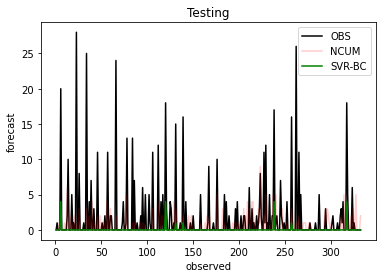

In [330]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "SVR-BC")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('SVR.png')

plt.show()

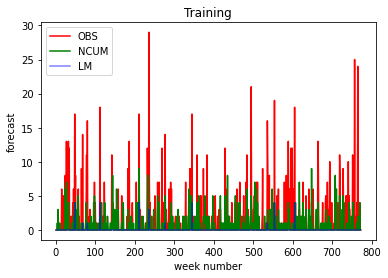

In [331]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Testing')

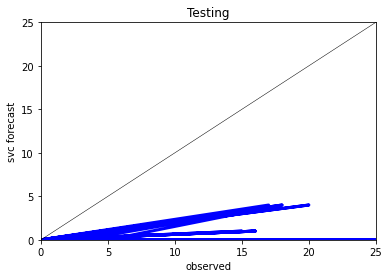

In [332]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('svc forecast')
plt.title('Testing')

Text(0.5, 1.0, 'Training')

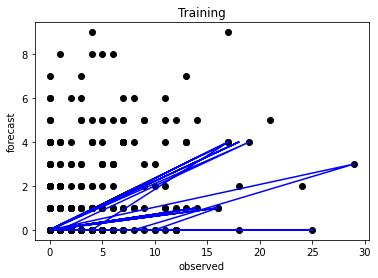

In [333]:
#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')



Text(0.5, 1.0, 'Testing')

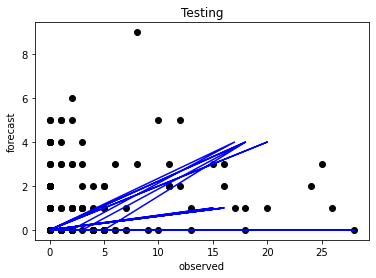

In [334]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

RANDOM FOREST CLASSIFIER

In [335]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [336]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [337]:
random_forest_model_predict = random_forest_model.predict(X_test) #Predictions on Testing data
print(random_forest_model_predict)

[0.33928673 0.93494854 0.33928673 0.33928673 0.33928673 2.84001827
 0.33928673 0.33928673 0.33928673 0.33928673 0.33928673 0.33928673
 0.69437906 1.84704313 0.33928673 0.33928673 0.33928673 1.9235567
 0.33928673 0.93494854 0.33928673 0.33928673 2.82709106 0.33928673
 0.33928673 2.32436378 0.33928673 0.33928673 0.33928673 0.33928673
 0.93494854 0.33928673 0.33928673 2.82709106 0.33928673 0.33928673
 1.82156343 0.33928673 2.9693531  0.33928673 0.33928673 2.0067256
 0.33928673 0.33928673 0.33928673 2.28839998 0.33928673 0.33928673
 0.33928673 0.33928673 0.93494854 0.33928673 0.33928673 0.69437906
 0.33928673 0.33928673 2.28839998 0.33928673 0.33928673 0.69437906
 0.69437906 0.33928673 0.33928673 0.33928673 0.33928673 2.82709106
 0.33928673 0.33928673 0.33928673 0.33928673 0.33928673 0.33928673
 0.93494854 1.82156343 0.33928673 0.33928673 0.93494854 3.43719486
 0.33928673 0.33928673 0.33928673 0.33928673 0.33928673 3.43719486
 0.33928673 2.9693531  0.33928673 0.33928673 0.93494854 0.339286

In [338]:
# model accuracy (ncmrwf forecast vs Bias Corrected (RF) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 0.853980400241786
MSE: 1.655267234535576
RMSE: 1.2865718924862208

-------Train Data--------
MAE: 0.8281571252840623
MSE: 1.6565549929089736
RMSE: 1.287072256289045

-----Training Accuracy-------
18.4
-----Testing Accuracy--------
-6.0


In [339]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))

-------observation vs ncmrwf forecast--------
MAE: 1.8313253012048192
MSE: 18.47590361445783
RMSE: 4.298360572876342
-------observation vs model forecast --------
MAE: 1.4891774090098016
MSE: 14.612863762916737
RMSE: 3.822677564602688


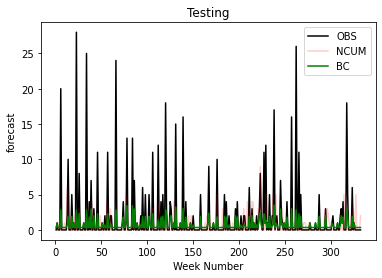

In [340]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('RF.png')
plt.show()

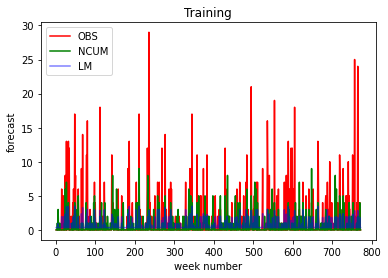

In [342]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()

Text(0.5, 1.0, 'Testing')

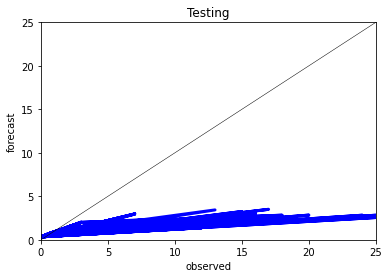

In [343]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')


Text(0.5, 1.0, 'Training')

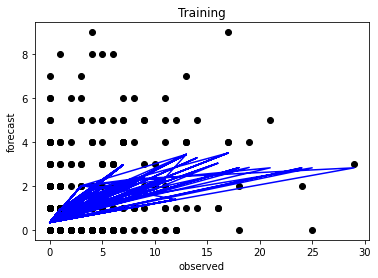

In [345]:
#plot outputs of training data

plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Training')

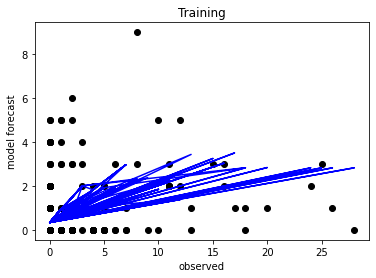

In [346]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('model forecast')
plt.title('Training')